In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import scipy


# Preprocessing


In [6]:
CATEGORIES = ['Black','Blue','Brown','Gray', 'Green','Maroon','Orange','Pink','Purple','Red','White','Yellow']
DATADIR = './datasets/colors'
IMG_SIZE = 100

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)


In [8]:
train_generator = train_datagen.flow_from_directory(
    DATADIR,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=CATEGORIES
)

Found 2257 images belonging to 12 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(
    DATADIR,
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=CATEGORIES
)

Found 560 images belonging to 12 classes.


# Creating Model


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(CATEGORIES), activation='softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')

In [13]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

Epoch 1/50


71/71 [==============================] - 15s 184ms/step - loss: 1.6429 - accuracy: 0.4112 - val_loss: 1.0676 - val_accuracy: 0.5946
Epoch 2/50
 1/71 [..............................] - ETA: 7s - loss: 1.4857 - accuracy: 0.4688

e:\Projek\color-classification\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 10s 136ms/step - loss: 0.9108 - accuracy: 0.6628 - val_loss: 0.8388 - val_accuracy: 0.6714
Epoch 3/50
71/71 [==============================] - 9s 126ms/step - loss: 0.8282 - accuracy: 0.6810 - val_loss: 0.7670 - val_accuracy: 0.7321
Epoch 4/50
71/71 [==============================] - 9s 124ms/step - loss: 0.7580 - accuracy: 0.7209 - val_loss: 0.8008 - val_accuracy: 0.7018
Epoch 5/50
71/71 [==============================] - 9s 131ms/step - loss: 0.7111 - accuracy: 0.7501 - val_loss: 0.7789 - val_accuracy: 0.7018
Epoch 6/50
71/71 [==============================] - 9s 132ms/step - loss: 0.6779 - accuracy: 0.7514 - val_loss: 0.6888 - val_accuracy: 0.7500
Epoch 7/50
71/71 [==============================] - 9s 129ms/step - loss: 0.5981 - accuracy: 0.7785 - val_loss: 0.7522 - val_accuracy: 0.7196
Epoch 8/50
71/71 [==============================] - 10s 141ms/step - loss: 0.5964 - accuracy: 0.7789 - val_loss: 0.6468 - val_accuracy: 0.7714
Epoch 9/50
71/7

In [14]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

18/18 [==============================] - 2s 108ms/step - loss: 0.6669 - accuracy: 0.8089
Test accuracy: 0.8089285492897034


In [15]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

18/18 [==============================] - 2s 119ms/step


In [16]:
actual_classes = validation_generator.classes

In [17]:
conf_mat = confusion_matrix(actual_classes, predicted_classes)

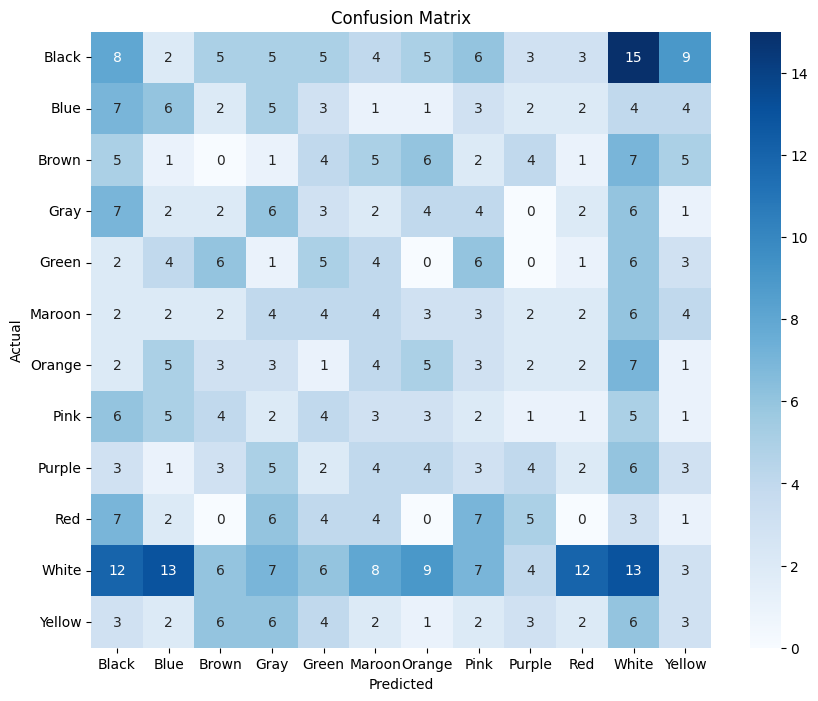

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Save the final model
model.save('color_classification_cnn_model.h5')